In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column",None)

In [3]:
bank_churn = pd.read_csv('Bank_Churn.csv')  
xl = pd.read_excel("Bank_Churn_Messy.xlsx")

In [4]:
bank_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


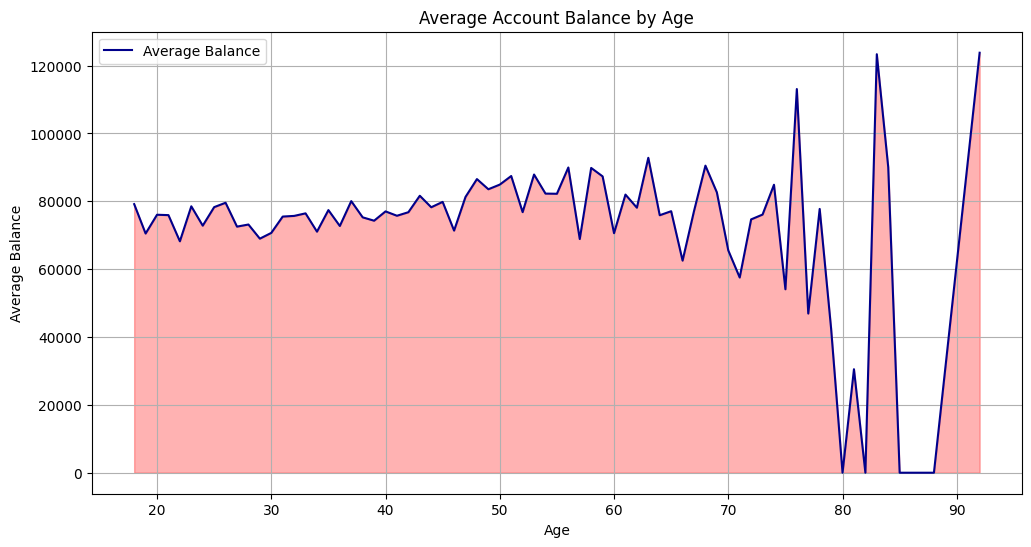

In [5]:
# Question 1
df = bank_churn[['Age', 'Balance']].dropna()

age_balance = df.groupby('Age')['Balance'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='Age', y='Balance', data=age_balance, label='Average Balance', color='darkblue')
plt.fill_between(age_balance['Age'], age_balance['Balance'], alpha=0.3, color='red')

plt.title('Average Account Balance by Age')
plt.xlabel('Age')
plt.ylabel('Average Balance')
plt.grid(True)
plt.show()


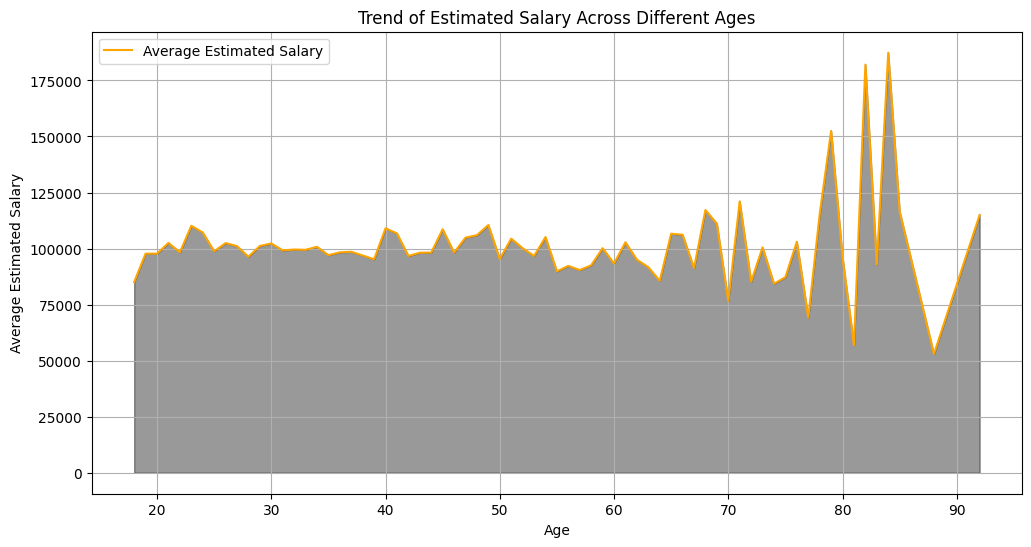

In [7]:
# Question 2
df2 = bank_churn[['Age','EstimatedSalary']].dropna()

age_salary = df2.groupby('Age')['EstimatedSalary'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=age_salary, x='Age', y='EstimatedSalary', label='Average Estimated Salary', color='orange')
plt.fill_between(age_salary['Age'], age_salary['EstimatedSalary'], color='black', alpha=0.4)

plt.title('Trend of Estimated Salary Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Average Estimated Salary')
plt.grid(True)
plt.show()


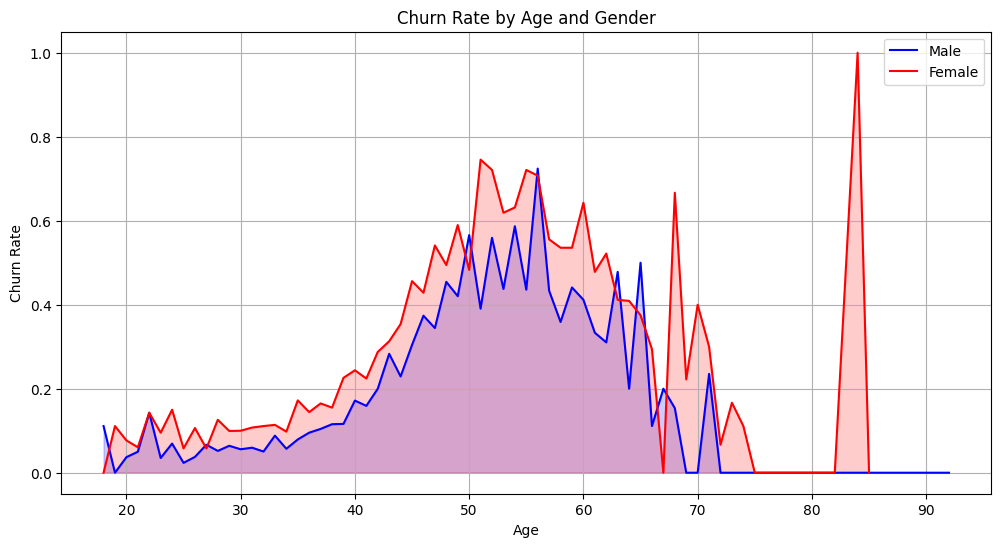

In [8]:
# Question 3
# (1 if churned, 0 if not)
df3 = bank_churn[['Age', 'Gender', 'Exited']].dropna()

churn_rate = df3.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()

male_data = churn_rate[churn_rate['Gender'] == 'Male']
female_data = churn_rate[churn_rate['Gender'] == 'Female']

plt.figure(figsize=(12, 6))

plt.plot(male_data['Age'], male_data['Exited'], label='Male', color='blue')
plt.fill_between(male_data['Age'], male_data['Exited'], alpha=0.2, color='blue')

plt.plot(female_data['Age'], female_data['Exited'], label='Female', color='red')
plt.fill_between(female_data['Age'], female_data['Exited'], alpha=0.2, color='red')

plt.title('Churn Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.legend()
plt.grid(True)
plt.show()
